In [77]:
# some notes

# Type of Market: Segment
# Can probably do a LinReg on type of market vs impressions/clicks ?? 

# Markets: Commercial, Country, Datacenter, IT, MOEM, MTL,. PQ, Rail, Residential, IT Channel

# Social Email seems to be bugged?  

# monthly buying basis still has WEEKLY entries in COST
# Impression -> Open -> Click [For EMAILS]
# Impressions -> Click [For Display]
# Impressions -> Click [Social Media]
# GOOGLE AD SENSE ONLY IN GERMANY, NORWAY AND UK.
# Phrase Match: Include meaning of keyword
# Exact Match: Same meaning of Keyword


# NOT ALL SEASONS HAVE ONLY ONE AD TYPE, SOME SEASONS RUN MULTIPLE ADDS

#Content Syndication -> Outsourcing ads to other sites

# Types of market vs Count
'''
Commercial 1692
Country 159
Datacenter 1046
IT 1159
MOEM 1865
MTL 141
PQ 6
Rail 2559
Residential 6518
IT Channel 1453
'''

# Maybe I focus on residential market? Since that has most of the google adsense data in Norway. 

# Maximizzing the effectiveness of an advertising campaign means maximizing the click/impressions for a particular adtype

'\nCommercial 1692\nCountry 159\nDatacenter 1046\nIT 1159\nMOEM 1865\nMTL 141\nPQ 6\nRail 2559\nResidential 6518\nIT Channel 1453\n'

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)


# TODO: 
# Find out how to plot each of the AdTypes by Impressions vs Week and have it sum to total impressions 

In [96]:
# Cleaning
df = pd.read_csv("dataset/Advertising.csv", low_memory = False, usecols = lambda c: not c.startswith("Unnamed:"), parse_dates = ['Week'])
df['Year'] = pd.DatetimeIndex(df['Week']).year
df['Month'] = pd.DatetimeIndex(df['Week']).month
df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear
df["BuyingBasis"].replace('instance', 'Instance', inplace = True)
df["AdType"].replace('Social email ', 'Social email', inplace = True)
# filling null values for engagement and impressions
df['Engagement'] = df['Engagement'].fillna(0)
df['Impressions'] = df['Impressions'].fillna(0)

df['AdType'].unique()


# num_week gives warning but im not sure what it means yet to be honest

/tmp/ipykernel_326/1423294916.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear


array(['Email', 'Display', 'Content syndication', 'Social email',
       'Social media', 'Programmatic', 'Google Ad Words'], dtype=object)

['Germany' 'Norway' 'United Kingdom']


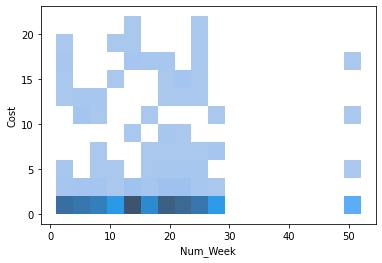

1453 944 2780
['IT UPS 2017' 'IT Power Distribution 17' 'IT Power manag 17'
 'IT Data Centre Infra 17' 'IT UPS maintenance 17'
 'IT Downtime protection 17']
            Week  Impressions  Clicks  Engagement  Opens  Leads     Segment  \
11538 2017-07-02          0.0      13         0.0      0      0  Commercial   
11550 2017-04-09        145.0      10         0.0      0      0  Commercial   

               Season CountryISO     CountryName           Region SubRegion  \
11538  LED-compliance         gb  United Kingdom  Northern Europe    UK & I   
11550  LED-compliance         gb  United Kingdom  Northern Europe    UK & I   

                Publication           AdType     Treatment BuyingBasis  Cost  \
11538  lighting regulations  Google Ad Words  Phrase match         CPC  22.0   
11550  lighting regulations  Google Ad Words  Phrase match         CPC  20.0   

       Year  Month  Num_Week  
11538  2017      7        26  
11550  2017      4        14  


In [4]:
# Looking at GoogleAdSense Data by Countrty

df_google = df.copy() 
df_google = df.loc[df['AdType'] == 'Google Ad Words']


#df_google.head(5)

#ad sense is cost per click so the clicks -> price graphs should look identical

print(df_google['CountryName'].unique())

df_google_ge = df_google.loc[df['CountryName'] == 'Germany']
df_google_uk = df_google.loc[df['CountryName'] == 'United Kingdom']
df_google_nw = df_google.loc[df['CountryName'] == 'Norway']

sns.histplot(x = df_google_uk['Num_Week'], y = df_google_uk["Cost"])
plt.show()


# looking at entries per country (market)
# Germany: 1453 (IT Channel) [ALl Marketing Campaigns target IT related issues]
# UK: 944 (Commercial)
# Norway: 2780 (Residential) [Only one to mention the company EATON]

# All these are tergetting different markets, feels kind of silly to compare them.

print(len(df_google_ge), len(df_google_uk), len(df_google_nw))



#print(df_google_uk["Segment"].unique())
#print(df_google_uk["Season"].unique())

# This is probably the word that is being targeted
#print(df_google_uk["Publication"].unique()) 
#print(df_google_ge["Publication"].unique()) 
#print(df_google_nw["Publication"].unique()) 

print(df_google_ge["Season"].unique())




print(df_google_uk.head(2))

# Linear/Polynomial Regression comparing COST of Ad and Clicks? 




In [5]:
df_LED = df.loc[df["Season"] == "IT Data Centre Infra 17"]

# ONLY Google Ad Words? Feels like they have individual Campaigns for google ads that are REGION locked? 
print(df_LED["AdType"].unique())
print(df_LED["CountryName"].unique())



df_LED.head(5)

# Sorting to steal later
#print(df_country[['Clicks', 'Cost', 'Treatment']].sort_values(by = ['Cost']))

['Google Ad Words']
['Germany']


,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week
11502,2017-05-29,592.0,9,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,31.0,2017,5,22
11521,2017-08-07,403.0,8,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,24.0,2017,8,32
11525,2017-09-04,384.0,9,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,24.0,2017,9,36
11570,2017-08-21,303.0,7,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,18.0,2017,8,34
11575,2017-07-10,458.0,7,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,17.0,2017,7,28


In [6]:
df_display = df.loc[df["AdType"] == "Display"]
df_email =  df.loc[df["AdType"] == "Email"]
df_display = df_display.sort_values(by = ['Clicks'])
df_email = df_email.sort_values(by = ['Clicks'])

df_display.tail(5)


,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week
5104,2017-05-22,35000.0,3891,29.0,0,0,MTL,SPD series,GB,United Kingdom,Northern Europe,UK & I,Hazardex,Display,Banner,Month,115.722897,2017,5,21
5107,2017-06-12,35000.0,4028,19.0,0,0,MTL,SPD series,GB,United Kingdom,Northern Europe,UK & I,Hazardex,Display,Banner,Month,115.722897,2017,6,24
5105,2017-05-29,35000.0,4056,38.0,0,0,MTL,SPD series,GB,United Kingdom,Northern Europe,UK & I,Hazardex,Display,Banner,Month,115.722897,2017,5,22
5108,2017-06-19,35000.0,4087,12.0,0,0,MTL,SPD series,GB,United Kingdom,Northern Europe,UK & I,Hazardex,Display,Banner,Month,115.722897,2017,6,25
5106,2017-06-05,35000.0,4207,19.0,0,0,MTL,SPD series,GB,United Kingdom,Northern Europe,UK & I,Hazardex,Display,Banner,Month,115.722897,2017,6,23


In [7]:
df_email.tail(5)

,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week
5031,2016-10-17,10800.0,1501,0.0,2214,0,MTL,GIR6000,DE,Germany,Western Europe,DACH,Gas Erdgas,Email,Newsletter text,Instance,513.7196,2016,10,42
701,2017-11-27,17970.0,1576,0.0,6466,0,Commercial,SAS,ES,Spain,Western Europe,West,Cdcommunicacion,Email,Newsletter banner,Instance,156.3435,2017,11,48
8213,2017-11-13,52793.0,1679,0.0,9574,0,Residential,Fire safety,IT,Italy,Western Europe,South,Voltimum,Email,Bespoke,Instance,3679.2837,2017,11,46
5032,2016-11-07,10800.0,1760,0.0,2300,0,MTL,GIR6000,DE,Germany,Western Europe,DACH,Gas Erdgas,Email,Newsletter text,Instance,513.7196,2016,11,45
7875,2017-06-12,21500.0,1900,0.0,5445,0,Residential,Fire safety,DE,Germany,Western Europe,DACH,Elektropraktiker,Email,Newsletter text,Instance,896.3694,2017,6,24


In [8]:
# number of seasons
df["Season"].nunique()

# does each season only have ONE adtype?


#DICTIONARY WITH KEY -> SEASON, VALUE -> Number of AdTypes
# each item should be a tuple ("adtype" , count)
adTypeCount = {}
for season in df["Season"].unique(): 
    adTypeCount[season] = 0


    

for season in df["Season"].unique():
    temp_df = df.loc[(df["Season"] == season) & (df["Year"] == 2017)]
    adTypeCount[season] = temp_df["AdType"].nunique()


    
    
# TODO: What is Social Email ? 
print(df["AdType"].unique())
df_evac = df.loc[(df["Season"] == "Evacuation") & (df["AdType"] == "Social email")]
df_evac = df_evac.sort_values(by = ['Impressions'])


df_evac.tail(5)

#Email, Display, Content Syndication, Social Email, Social Media

['Email' 'Display' 'Content syndication' 'Social email ' 'Social media'
 'Programmatic' 'Google Ad Words']


,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week


In [49]:
df["Segment"].unique()

df_res = df.copy()

df_res = df.loc[df["Segment"] == "Residential"]


# Countries
df_res["CountryName"].unique()

#Ad Types [Everything besides Social Email]
df_res["AdType"].unique()

# looking at success of the residential market




array(['Display', 'Email', 'Content syndication', 'Programmatic',
       'Social media', 'Google Ad Words'], dtype=object)

5697
6518
['Email' 'Display' 'Social media' 'Programmatic' 'Google Ad Words']
160


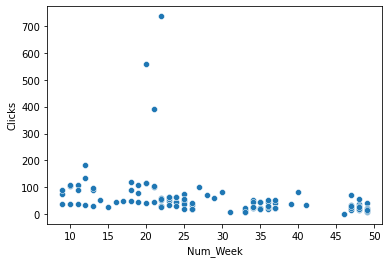

In [82]:
df_res_nw = df.loc[df["CountryName"] == "Norway"]

# Of the 6518 ads in residential market, 5697 are targetted towards Norway
print(df_res_nw["AdType"].shape[0])
print(df_res.shape[0])

# Residential Market in Norway? 2016, 2017
df_res_nw = df_res_nw.loc[(df_res_nw["Year"] == 2017)]

# Ad Types 2017: Email Display, SMedia, Programmatic, Google
# Ad Types 2016: Display,  Social Media, Programmatic :: Maybe restrict to 2017 ?? 
print(df_res_nw["AdType"].unique())

# 2016 - 1298
# 2017 - 4399

# splitting up current dataframe by adtype

df_resnwEmail = df_res_nw.loc[df_res_nw["AdType"] == "Email"]
df_resnwDisplay = df_res_nw.loc[df_res_nw["AdType"] == "Display"]
df_resnwSM = df_res_nw.loc[df_res_nw["AdType"] == "Social media"]
df_resnwProg = df_res_nw.loc[df_res_nw["AdType"] == "Programmatic"]
df_resnwGoogle = df_res_nw.loc[df_res_nw["AdType"] == "Google Ad Words"]


# ONLY 6 EMAILS? 
print(df_resnwSM.shape[0])
      
sns.scatterplot(data = df_resnwDisplay, x = "Num_Week", y = "Clicks") 
plt.show()




In [78]:
df_resnwDisplay.head(5)

,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week
9808,2017-05-15,98417.0,558,0.0,0,0,Residential,xComfort,NO,Norway,Northern Europe,Nordics,Vi i Villa,Display,Advertorial,Month,1.366442,2017,5,20
9809,2017-05-22,94851.0,390,0.0,0,0,Residential,xComfort,NO,Norway,Northern Europe,Nordics,Vi i Villa,Display,Advertorial,Month,1.366442,2017,5,21
9810,2017-05-29,169899.0,737,0.0,0,0,Residential,xComfort,NO,Norway,Northern Europe,Nordics,Vi i Villa,Display,Advertorial,Month,1.366442,2017,5,22
9811,2017-02-27,18839.0,39,0.0,0,0,Residential,xComfort,NO,Norway,Northern Europe,Nordics,Byggebolig,Display,Banner,Month,308.048815,2017,2,9
9812,2017-03-06,23397.0,39,0.0,0,0,Residential,xComfort,NO,Norway,Northern Europe,Nordics,Byggebolig,Display,Banner,Month,308.048815,2017,3,10


['Display' 'Email' 'Social media' 'Content syndication' 'Social email'
 'Programmatic']
        Week  Impressions  Clicks  Engagement  Opens  Leads Segment  \
0 2016-10-03       1102.0     320         0.0      0      0    MOEM   
1 2016-10-17       2793.0     519         0.0      0      0    MOEM   
2 2016-10-24       3195.0      16         0.0      0      0    MOEM   
3 2016-10-31       2177.0      13         0.0      0      0    MOEM   
4 2016-11-07       2993.0     244         0.0      0      0    MOEM   

               Season CountryISO     CountryName           Region SubRegion  \
0  Circuit Protection         GB  United Kingdom  Northern Europe    UK & I   
1  Circuit Protection         GB  United Kingdom  Northern Europe    UK & I   
2  Circuit Protection         GB  United Kingdom  Northern Europe    UK & I   
3  Circuit Protection         GB  United Kingdom  Northern Europe    UK & I   
4  Circuit Protection         GB  United Kingdom  Northern Europe    UK & I   

         P

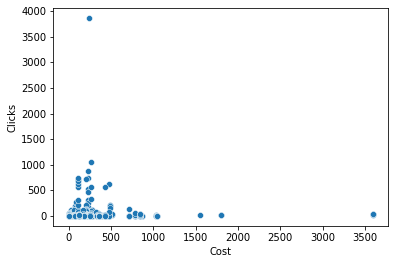

In [140]:
# Looking at MOEM data

df_MOEM = df.loc[df["Segment"] == "MOEM"]

df_MOEM.shape[0]

print(df_MOEM["AdType"].unique())

# THERE IS A SPACE AFTER SOCIAL EMAIl?? 
df_MOEM_test = df_MOEM.loc[df_MOEM["AdType"] == "Display"]
df_MOEM_test = df_MOEM_test.reset_index(drop = True)
df_MOEM_test.shape[0]

print(df_MOEM_test.head(5))

# 16 S-Email
# 351 Email
# 1342 Display
# 10 Content Syndication
# 29 Programmatic
# 117 soecial media

# engFactor = clicks/impressions


# making engFactor
engFactor = []

sns.scatterplot(data = df_MOEM_test, x = "Cost", y = "Clicks") 
plt.show()



        Week  Impressions  Clicks  Engagement  Opens  Leads Segment  \
0 2016-10-03       1102.0     320         0.0      0      0    MOEM   
1 2016-10-17       2793.0     519         0.0      0      0    MOEM   
2 2016-10-24       3195.0      16         0.0      0      0    MOEM   
3 2016-10-31       2177.0      13         0.0      0      0    MOEM   
4 2016-11-07       2993.0     244         0.0      0      0    MOEM   

               Season CountryISO     CountryName  ... SubRegion  \
0  Circuit Protection         GB  United Kingdom  ...    UK & I   
1  Circuit Protection         GB  United Kingdom  ...    UK & I   
2  Circuit Protection         GB  United Kingdom  ...    UK & I   
3  Circuit Protection         GB  United Kingdom  ...    UK & I   
4  Circuit Protection         GB  United Kingdom  ...    UK & I   

         Publication   AdType Treatment BuyingBasis        Cost  Year  Month  \
0  Drives & Controls  Display    Banner       Month  222.945835  2016     10   
1  Drives 

<AxesSubplot:xlabel='Cost', ylabel='engFactor'>

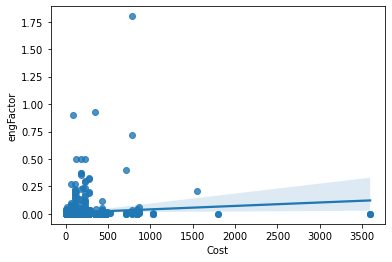

In [157]:


rm_index = [] 
# removing all that have zero impressions ?? 
for x in range(len(df_MOEM_test)):
    if df_MOEM_test.loc[x, "Impressions"] == 0:
        rm_index.append(x)

df_MOEM_test = df_MOEM_test.drop(df_MOEM_test.index[rm_index]).reset_index(drop = True)
engFactor = []
for x in range(len(df_MOEM_test)):
    clicks = df_MOEM_test.loc[x, "Clicks"]
    impressions = df_MOEM_test.loc[x, "Impressions"]
    engFactor.append(clicks / impressions)

df_MOEM_test["engFactor"] = engFactor

print(df_MOEM_test.head(5))

sns.regplot(data = df_MOEM_test, x = "Cost", y = "engFactor") 



<AxesSubplot:xlabel='Impressions', ylabel='Clicks'>

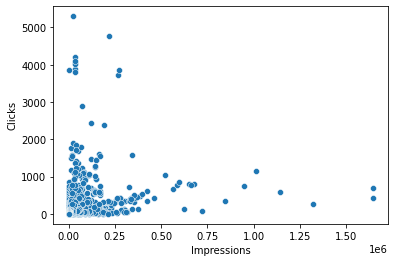

In [162]:

    sns.scatterplot(data = df, x = "Impressions", y = "Clicks") 


In [163]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/tmp/ipykernel_326/844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


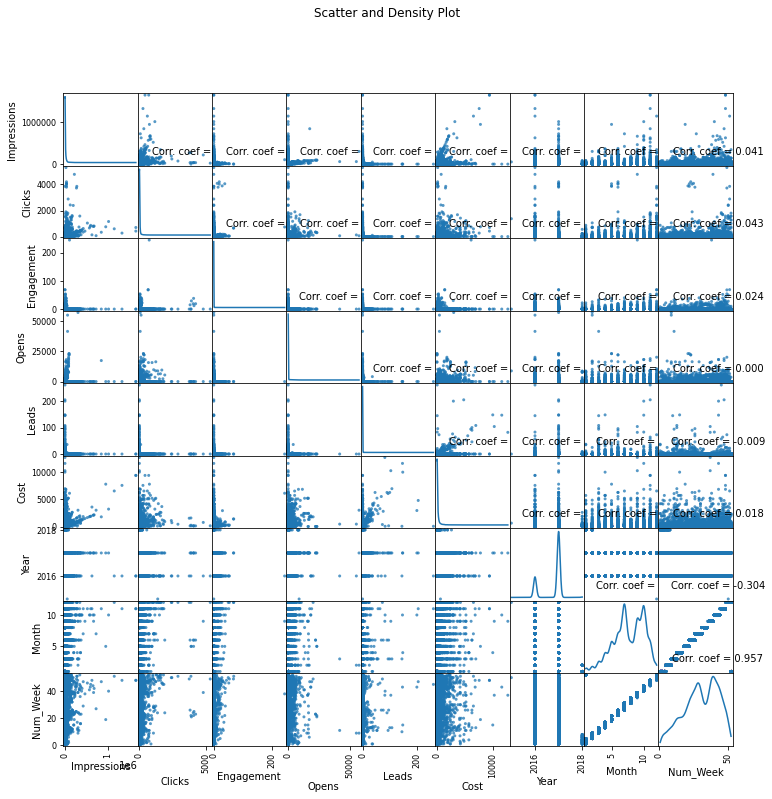

In [164]:
plotScatterMatrix(df, 12, 10)
plt

16598
55
        Week  Impressions  Clicks  Engagement  Opens  Leads     Segment  \
0 2017-11-20     843224.0     333         0.0  17445      0  Commercial   
1 2017-07-03     722240.0      69         0.0      0      0  Datacenter   
2 2017-10-23     251061.0     318         0.0      0      0  Datacenter   
3 2017-09-25     298154.0      46         0.0      0      0  Datacenter   
4 2017-03-13     301045.0     138         0.0      0      0          IT   

                             Season CountryISO     CountryName  \
0                               SAS         DE         Germany   
1  Infrastructure with Intelligence         NL     Netherlands   
2  Infrastructure with Intelligence         GB  United Kingdom   
3  Infrastructure with Intelligence         GB  United Kingdom   
4                               OPM         DE         Germany   

            Region SubRegion          Publication        AdType  \
0   Western Europe      DACH               Scope          Email   
1  Northe

<AxesSubplot:xlabel='Cost', ylabel='Impressions'>

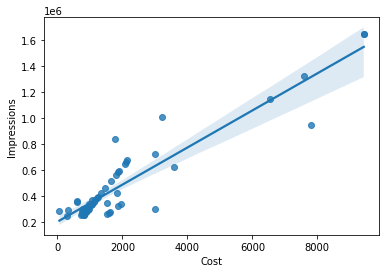

In [195]:
# testing something

df_imp = df.copy() 

print(df_imp.shape[0])
df_imp = df_imp.loc[(df["Impressions"] > 250000) & (df["Clicks"] > 0)].reset_index(drop = True)
print(df_imp.shape[0])

df_imp.sort_values(by = "Impressions")

print(df_imp.head(5))

sns.regplot(data = df_imp, x = "Cost", y = "Impressions") 


In [202]:
df_imp

df_fb = df.copy()

df_fb = df_fb.loc[df_fb["Publication"] == "Facebook"]

df_fb.shape[0]

37